## Figures for Network model of Latent Recurrent Discharge (LRD)

### Some imports and settings

In [5]:
SAVE_FIGS = False       # see save_args above for configuration
DOWNLOAD_CACHE = False  # if you want the cache files (~30 GB), set to True instead of running simulations again

In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import warnings

import brian2.numpy_ as np
import matplotlib.pyplot as plt

from settings import COLOR, G_GABA_LIST, TAU_KCC2_LIST, constants, logging, time_unit

# start from defaults before loading stylesheet
plt.style.use("default")
plt.style.use("style/article.mplstyle")

# suppress warnings
np.seterr(all="ignore")
warnings.filterwarnings("ignore")

logger = logging.getLogger("lrd")

save_args = dict(use_args=False, close=False, file_formats=["svg", "jpg"])

In [8]:
if DOWNLOAD_CACHE:
    %pip install git+https://github.com/ChrisCurrin/dropbox-downloader.git
    import dropbox

    dropbox.downloadFile("https://www.dropbox.com/sh/noqzojddijvvs2a/AAD8ppgjSyi7QIcoGu0e3Ylba?dl=0", ".", unzip=True, retain_zip=False)


# Explain figure

In [5]:
from scripts.lrdfigure_explain import Explain

np.random.seed(1337)

explain = Explain()

mv_step = 4 # normally 2 mV
time_per_value = 20 # this is shorter than in paper (60 s)
egaba = [-74, -40] # [start, stop] 

diff = egaba[1] - egaba[0]
values = diff // mv_step
steps = values - 1
duration = values * time_per_value

ehco3 = -18
phco3 = 0.2
pcl = 1 - phco3
ecl = [round((e - phco3 * ehco3) / pcl, 2) for e in egaba]

explain.run(
    duration=duration,
    num_ecl_steps=steps,
    E_Cl_0=ecl[0],
    E_Cl_end=ecl[1],
    # cache=True, # note that this is imperfectly implemented currently
)
explain.plot()
if SAVE_FIGS:
    explain.save_figure(**save_args)
explain

2023-06-04 09:10:29 [    INFO] E_Cl_0=-88.0, E_Cl_end=-45.5, duration=160, num_ecl_steps=7                                (sim::sim.py::149)
2023-06-04 09:10:29 [    INFO] Incrementing E_Cl by 5.31mV every 20.00s for population: neurons                           (sim::sim.py::540)
2023-06-04 09:10:29 [    INFO] [1.0] mM of Mg will be removed (at 0. ss) and added back (at 160. ss) over 5.0s at a rate_ext of [0.0002]/ms) (sim::sim.py::565)
2023-06-04 09:10:29 [    INFO] took 0.27s to setup                                                                        (sim::sim.py::630)
2023-06-04 09:10:29 [    INFO] running                                                                                    (sim::sim.py::632)
2023-06-04 09:10:30 [    INFO] /home/ccurrin/mambaforge/envs/brian2/bin/x86_64-conda-linux-gnu-cc -Wno-unused-result -Wsign-compare -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /home/ccurrin/mambaforge/envs/brian2/include -fPIC -O2 -isystem /home/ccurrin/mambaforge/envs/bria

Starting simulation at t=0 s for duration 160 s
27.4519 s (17%) simulated in 10s, estimated 48s remaining.
58.5951 s (36%) simulated in 20s, estimated 35s remaining.
89.2957 s (55%) simulated in 30s, estimated 24s remaining.
119.356 s (74%) simulated in 40s, estimated 14s remaining.
148.907 s (93%) simulated in 50s, estimated 4s remaining.
160 s (100%) simulated in 53s


2023-06-04 09:11:31 [    INFO] took 61.76s to run                                                                         (sim::sim.py::672)
2023-06-04 09:11:31 [    INFO] plotting figure_1_explain                                                                  (scripts.lrdfigure_explain::lrdfigure_explain.py::40)
2023-06-04 09:11:31 [    INFO] Population rates                                                                           (brian2viz::plot_trace.py::131)
2023-06-04 09:11:31 [    INFO] Plot postsynaptic conductances - ['g_AMPA', 'g_GABA', 'g_NMDA']                            (brian2viz::plot_trace.py::281)
Plotting state average: 3it [00:00, 16.75it/s]
2023-06-04 09:11:32 [    INFO] 	 plotted - Net g = 427.95 (uS)                                                            (brian2viz::plot_trace.py::321)
2023-06-04 09:11:32 [ WARNING] No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with

# Alter conductances

1. Emulate picrotoxin (pink) by **reducing** $g_{GABA_{max}}$.
2. Emulate benzodiazepines (green) by **increasing** $g_{GABA_{max}}$.

We can see the effect of benzodiazepines depends on $E_{GABA}$.

2023-06-04 09:11:38 [    INFO] loaded ['drug', 'E_Cl_0', '$g_{AMPA_{max}}$', 'run_idx', 'var'] ((600000, 288)) from cache temp/73e802d9ed87f661948359e04e45807c.h5 (core.lrdfigure::lrdfigure.py::446)
2023-06-04 09:11:38 [    INFO] plotting                                                                                   (scripts.lrdfigure_drugs::lrdfigure_drugs.py::71)
2023-06-04 09:11:38 [    INFO] drug = 0.25 	 ecl = -70.5                                                                  (scripts.lrdfigure_drugs::lrdfigure_drugs.py::209)
2023-06-04 09:11:38 [    INFO] drug = 0.5 	 ecl = -70.5                                                                   (scripts.lrdfigure_drugs::lrdfigure_drugs.py::209)
2023-06-04 09:11:38 [    INFO] drug = 1 	 ecl = -70.5                                                                     (scripts.lrdfigure_drugs::lrdfigure_drugs.py::209)
2023-06-04 09:11:38 [    INFO] drug = 2 	 ecl = -70.5                                                         

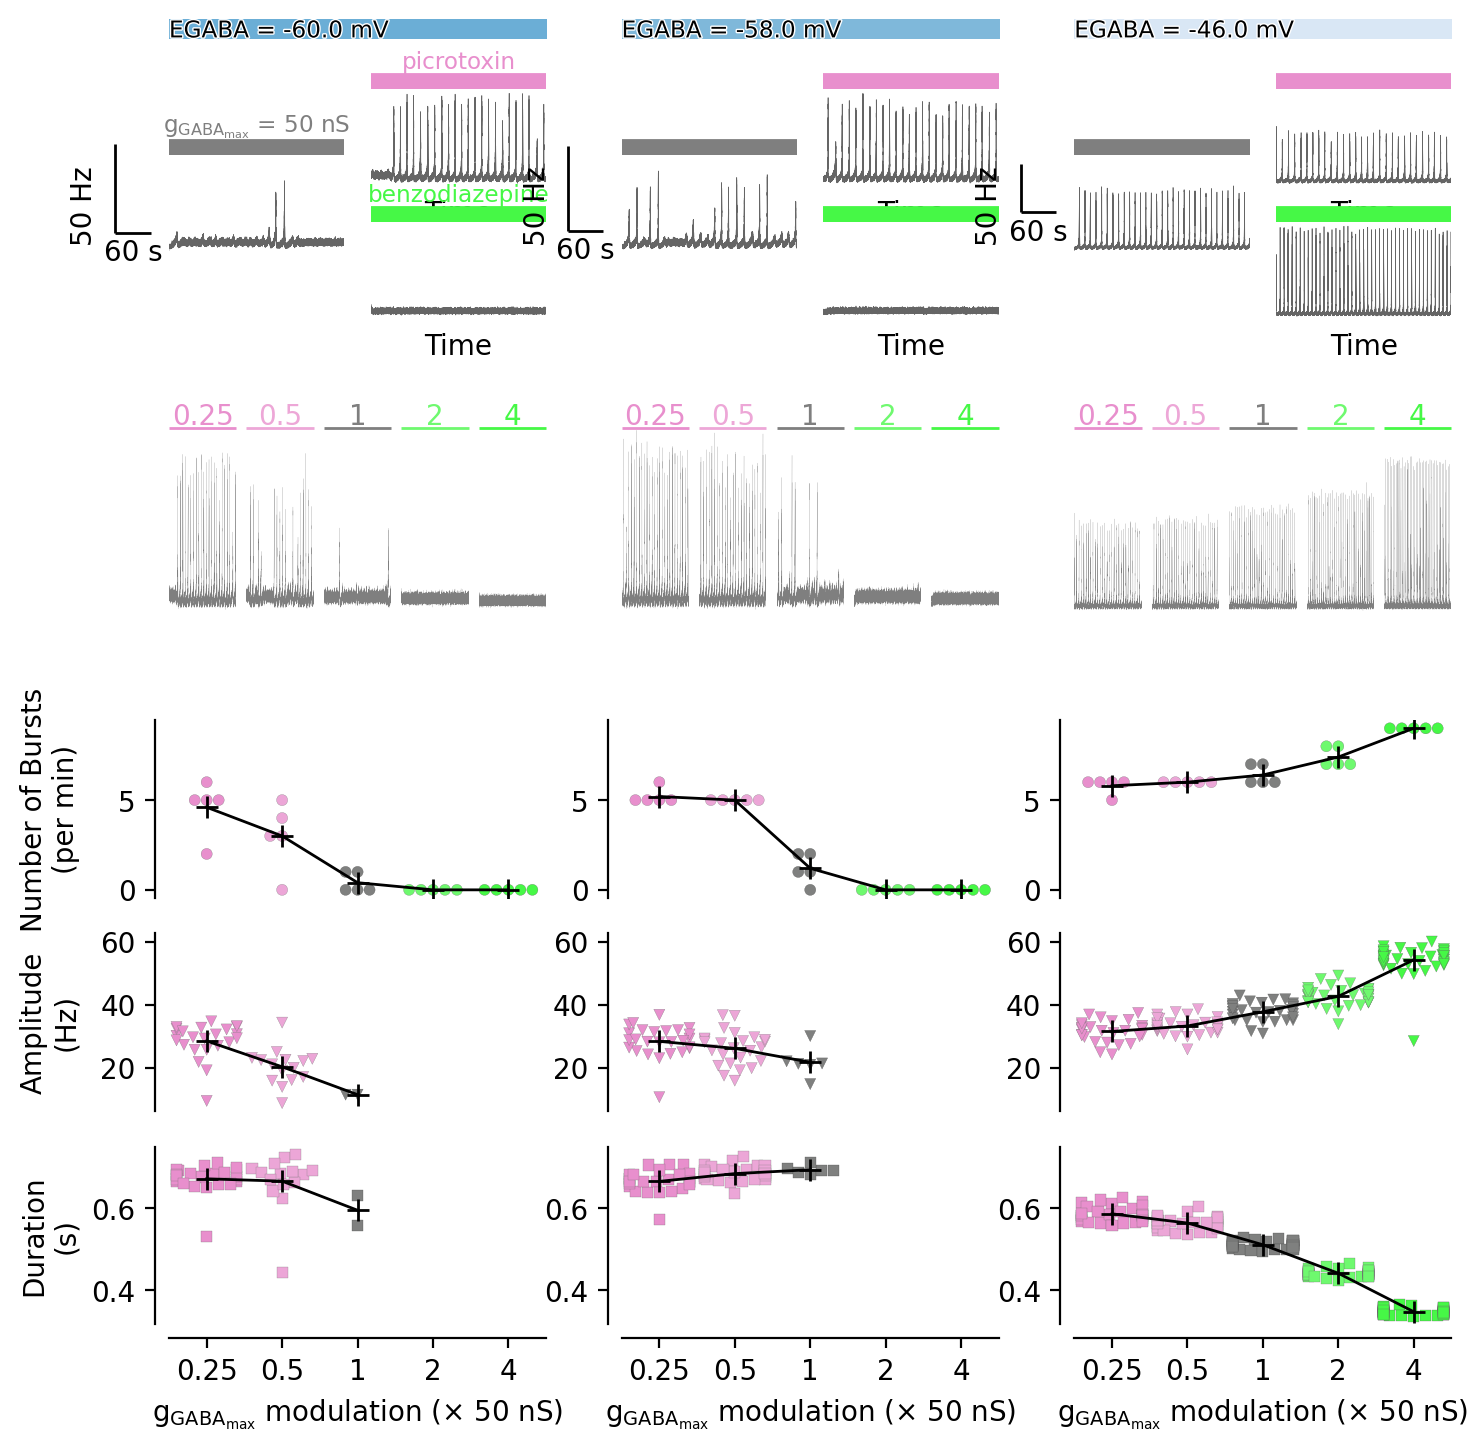

In [6]:
from scripts.lrdfigure_drugs import Drugs

ehco3 = -18
phco3 = 0.2
pcl = 1 - phco3
egabas = [-60, -58, -46]
E_Cl_0s = [round((e - phco3 * ehco3) / pcl, 2) for e in egabas]
drugs = Drugs(benzo_strengths=(0.25, 0.5, 1, 2, 4), E_Cl_0s=E_Cl_0s)
drugs.run()
drugs.plot()
if SAVE_FIGS:
    drugs.save_figure(**save_args)

## Start having dynamic chloride $Cl^-$

We compared networks with either hyperpolarised ($E_{Cl^-} = -88 mV \approx E_{GABA} = -74 mV$) or depolarised ($E_{Cl^-} = -60 mV \approx E_{GABA} = -51.6 mV$) EGABA.

The starting $E_{GABA}$ seems to have neglible, if any effect.

We further consider the effect of GABA conductance $g_{GABA_{max}}$ (brightness, rows) along with different $\tau_{KCC2}$ values (hue, traces).

2023-06-04 09:11:53 [    INFO] loaded ['$g_{GABA_{max}}$', '$\it{\tau}_{\rm{KCC2}}$', '$ECl\it{^-} _0$', 'run_idx', 'var'] ((600000, 960)) from cache temp/7c4acf46970cee69ba3d57090befe729.h5 (core.lrdfigure::lrdfigure.py::446)
2023-06-04 09:11:53 [    INFO] plotting                                                                                   (scripts.lrdfigure_chloride::lrdfigure_chloride.py::73)
Plotting state average: 4it [00:00, 99.68it/s]
Plotting state average: 4it [00:00, 105.94it/s]
Plotting state average: 4it [00:00, 105.38it/s]
Plotting state average: 4it [00:00, 106.44it/s]
Plotting state average: 4it [00:00, 105.85it/s]
Plotting state average: 4it [00:00, 106.93it/s]
2023-06-04 09:11:58 [    INFO] took 5.39s to plot                                                                         (scripts.lrdfigure_chloride::lrdfigure_chloride.py::551)


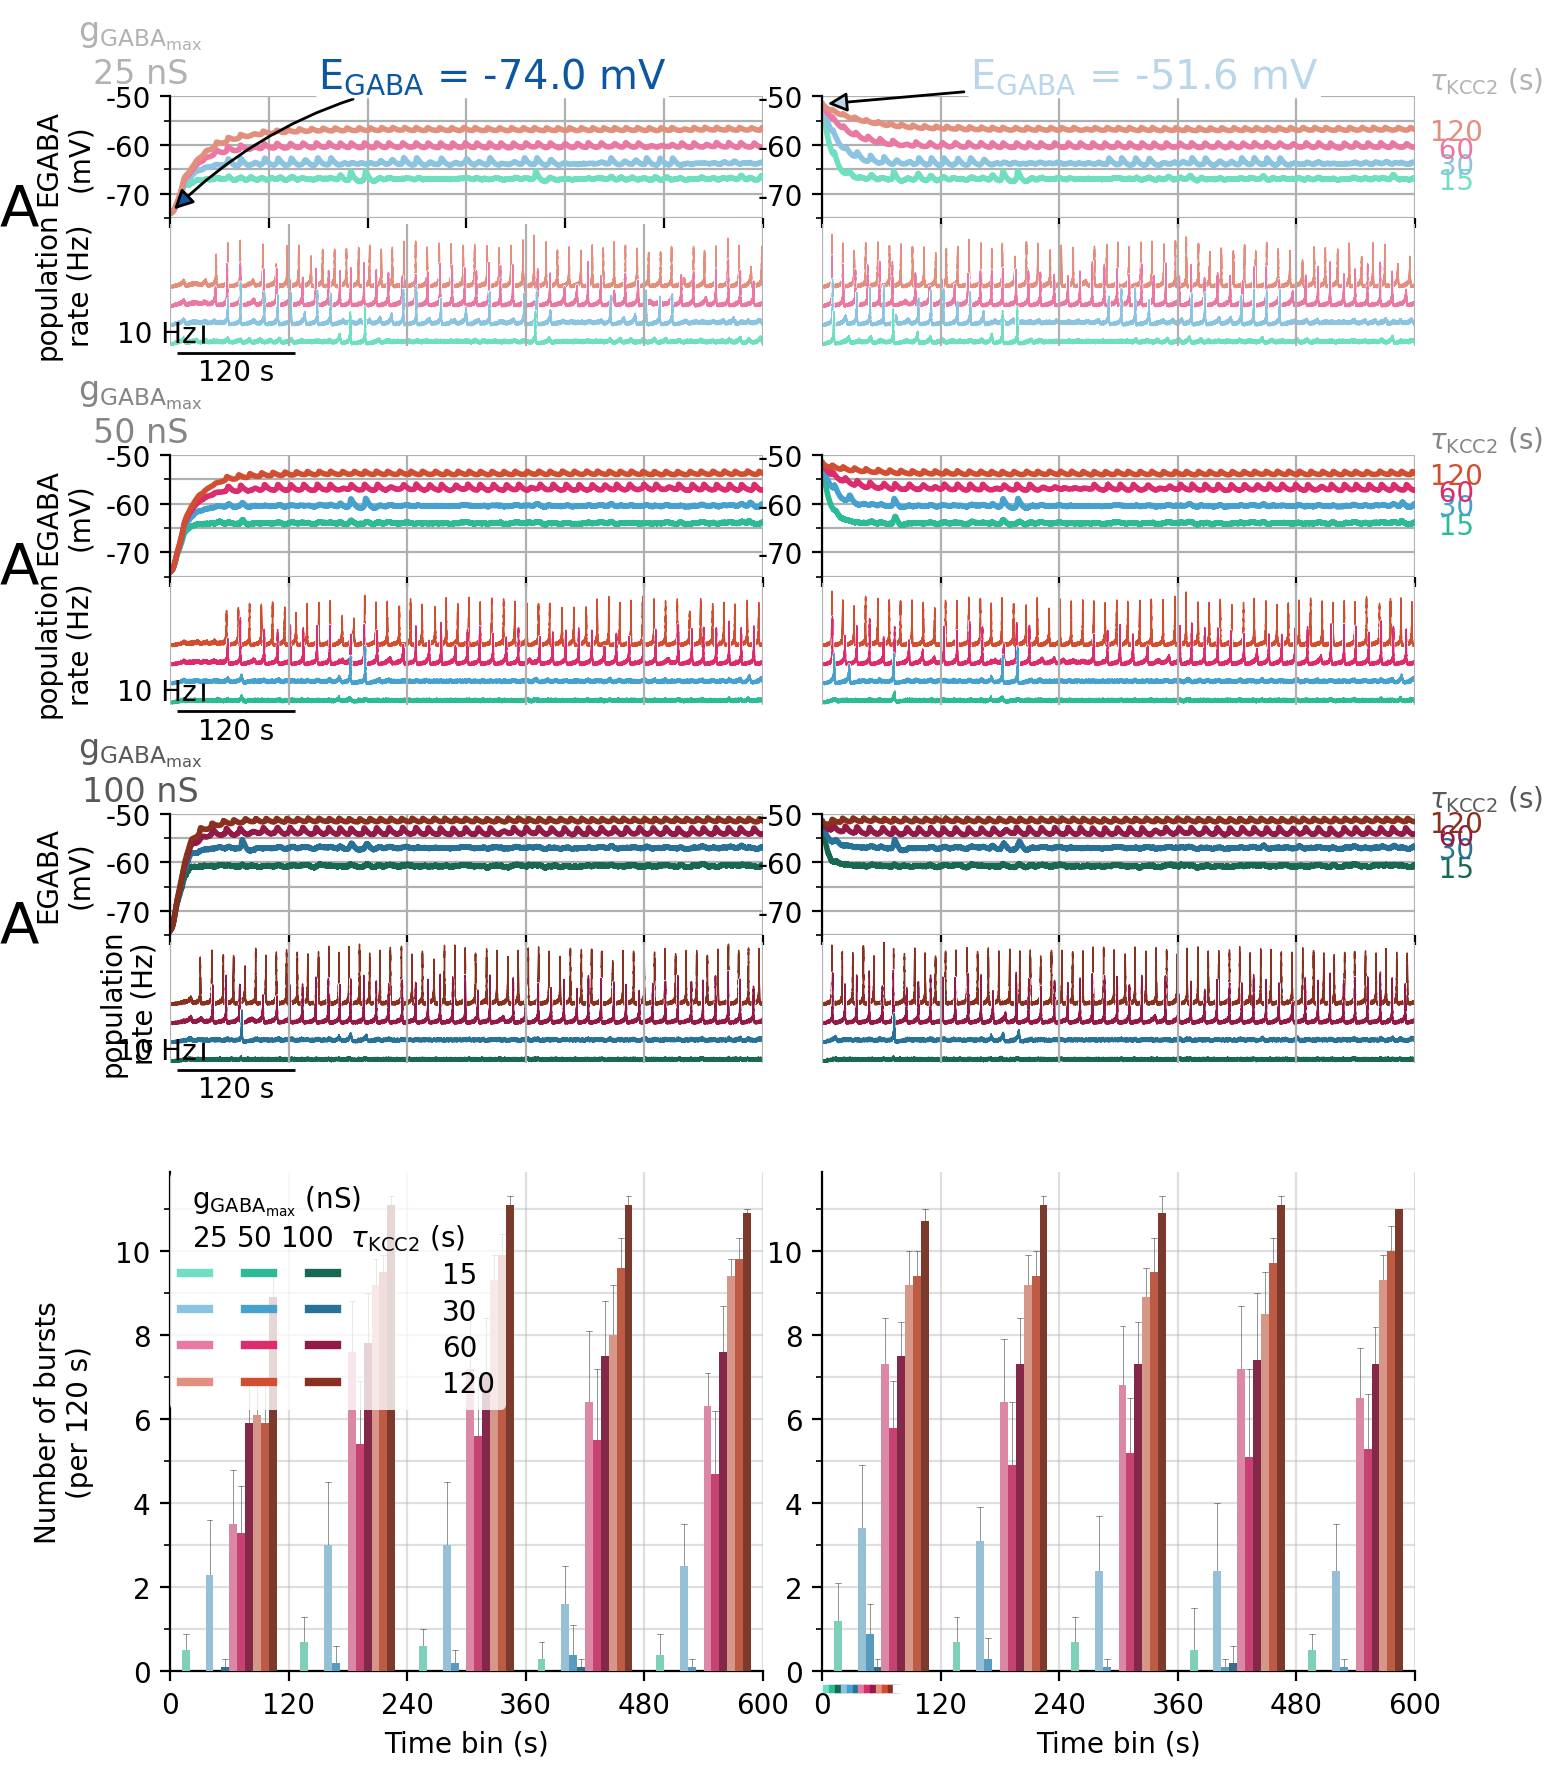

In [7]:
from scripts.lrdfigure_chloride import Chloride

cl = Chloride(
    tau_KCC2s=TAU_KCC2_LIST[::2][:-1],
    E_Cl_0s=(-60, -88),
    g_GABAs=(50, 25, 100),
    seeds=(None, 1038, 1337, 1111, 1010, 1011, 1101, 1110, 11110, 111100),
)
cl.run(duration=600)
cl.plot(timeit=True, colorbar=False)
if SAVE_FIGS:
    cl.save_figure(**save_args)
del cl

### Supplementary work: the effect of neuron size ($L$) and chloride extrusion ($\tau_{KCC2}$) on the number of bursts in a network

2023-06-04 09:12:08 [    INFO] loaded ['$g_{GABA_{max}}$', '$\it{\tau}_{\rm{KCC2}}$', '$ECl\it{^-} _0$', 'Length', 'run_idx', 'var'] ((600000, 720)) from cache temp/88f22125d345441bc6af63a001b3ea35.h5 (core.lrdfigure::lrdfigure.py::446)
2023-06-04 09:12:08 [    INFO] plotting                                                                                   (scripts.lrdfigure_chloride_length::lrdfigure_chloride_length.py::79)
Plotting state average: 5it [00:00, 103.31it/s]
Plotting state average: 5it [00:00, 141.90it/s]
Plotting state average: 5it [00:00, 141.78it/s]
Plotting state average: 5it [00:00, 140.68it/s]
Plotting state average: 5it [00:00, 139.47it/s]
Plotting state average: 5it [00:00, 141.77it/s]
Plotting state average: 5it [00:00, 142.22it/s]
Plotting state average: 5it [00:00, 107.15it/s]
Plotting state average: 5it [00:00, 107.28it/s]
2023-06-04 09:12:14 [    INFO] took 5.76s to plot                                                                         (scripts.lrdfigur

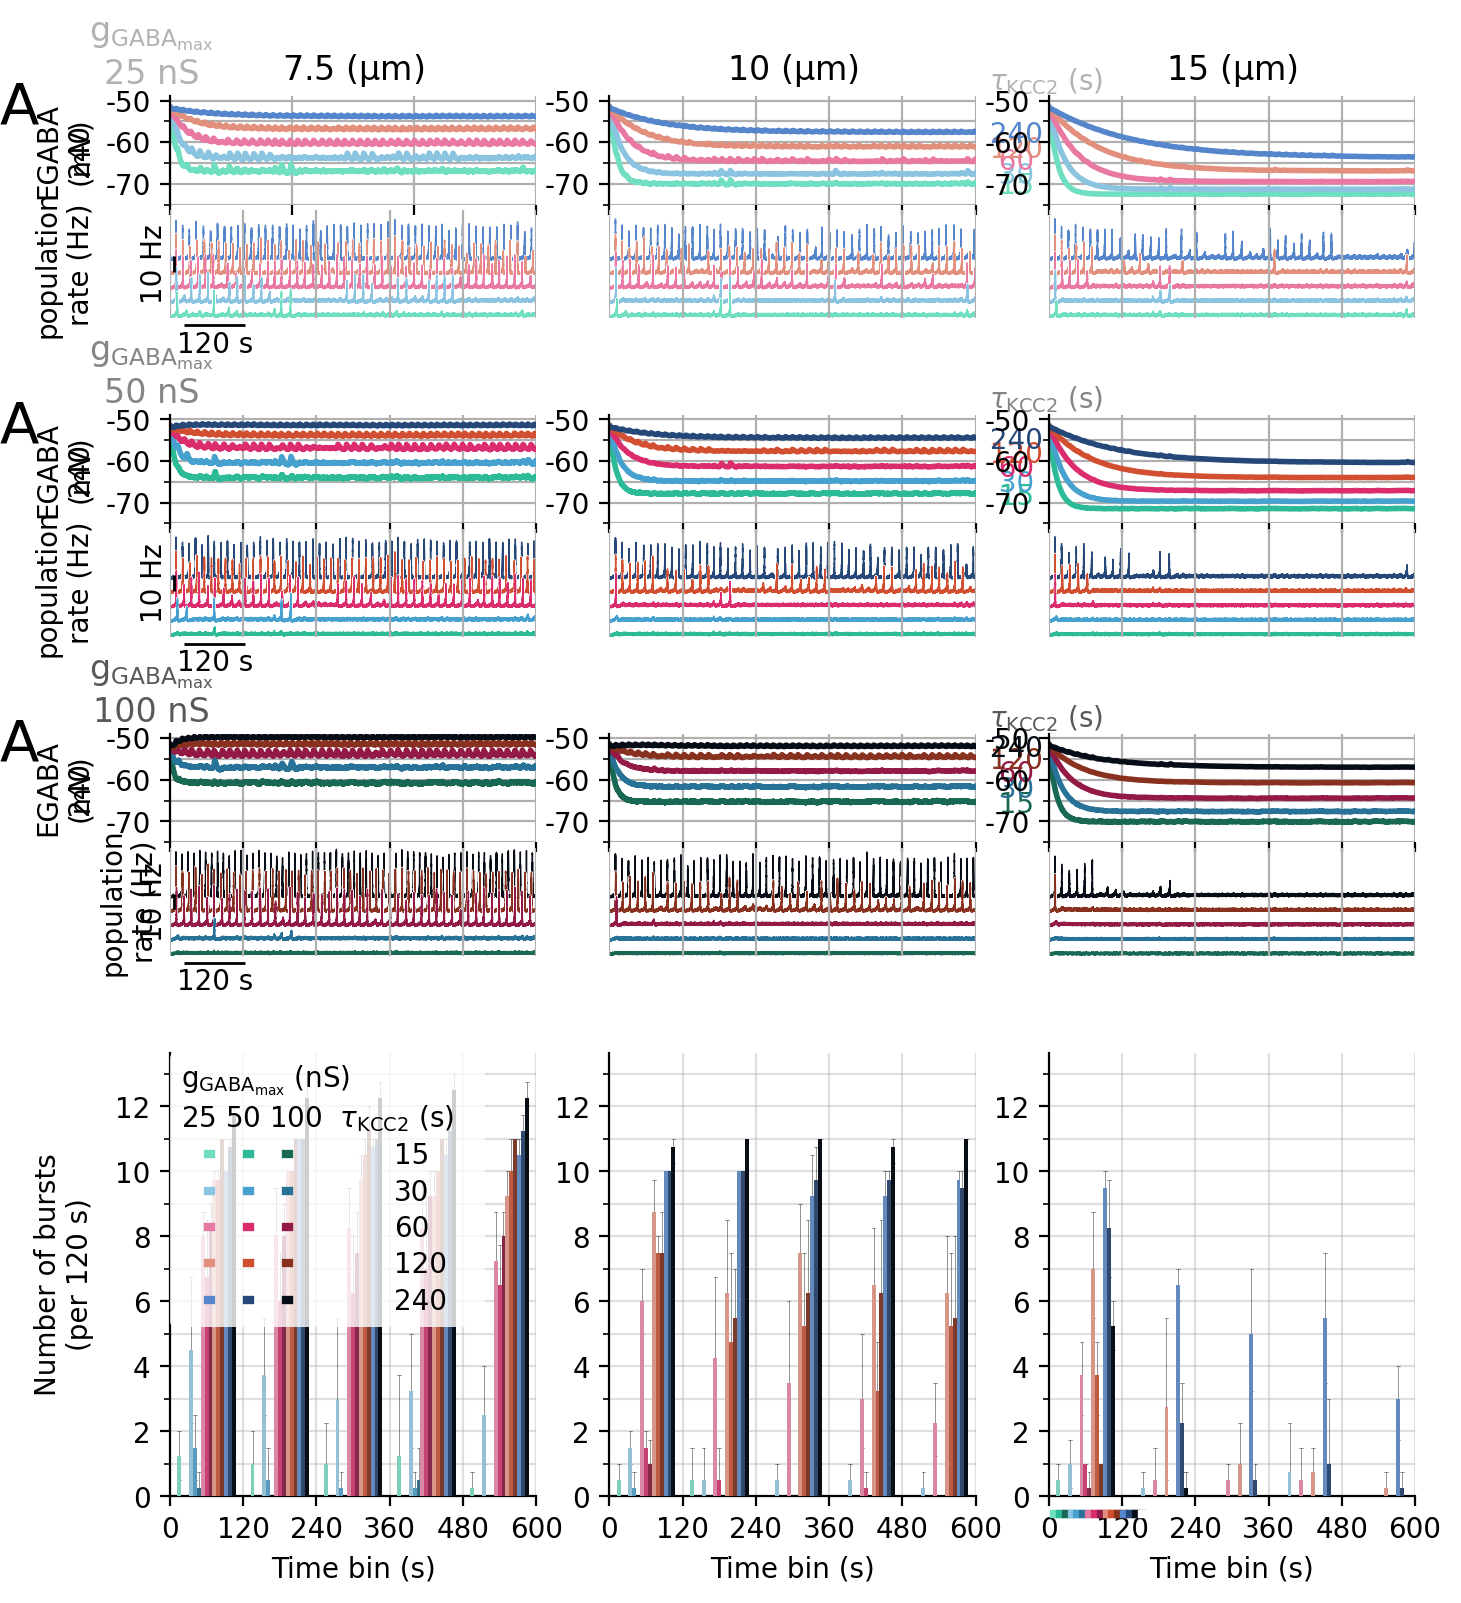

In [8]:
from scripts.lrdfigure_chloride_length import ChlorideLength

cl = ChlorideLength(
        g_GABAs=(50, 25, 100),
        seeds=(
            None,
            1038,
            1337,
            1111,
        ),
    )

cl.run(duration=600)
cl.plot(timeit=True, colorbar=False)
if SAVE_FIGS:
    cl.save_figure(**save_args)

# Explore time constants of "Excitatory" and "Inhibitory" KCC2

$\tau_{KCC2_{exc}}$ = [15, 21, 30, 42, 60, 84, 120, 169, 240]

$\tau_{KCC2_{inh}}$ = [15, 21, 30, 42, 60, 84, 120, 169, 240]

2023-06-07 09:52:02 [    INFO] loaded ['$g_{GABA_{max}}$', '$\it{\tau}_{\rm{KCC2_{PC}}}$', '$\it{\tau}_{\rm{KCC2_{IN}}}$', 'run_idx', 'var'] ((60000, 9720)) from cache temp/a48af470c6ae6c969599d9bd5e1f0630.h5 (core.lrdfigure::lrdfigure.py::446)
2023-06-07 09:52:02 [    INFO] plotting                                                                                   (scripts.lrdfigure_tau::lrdfigure_tau.py::106)
2023-06-07 09:52:37 [    INFO] took 34.90s to plot                                                                        (scripts.lrdfigure_tau::lrdfigure_tau.py::633)


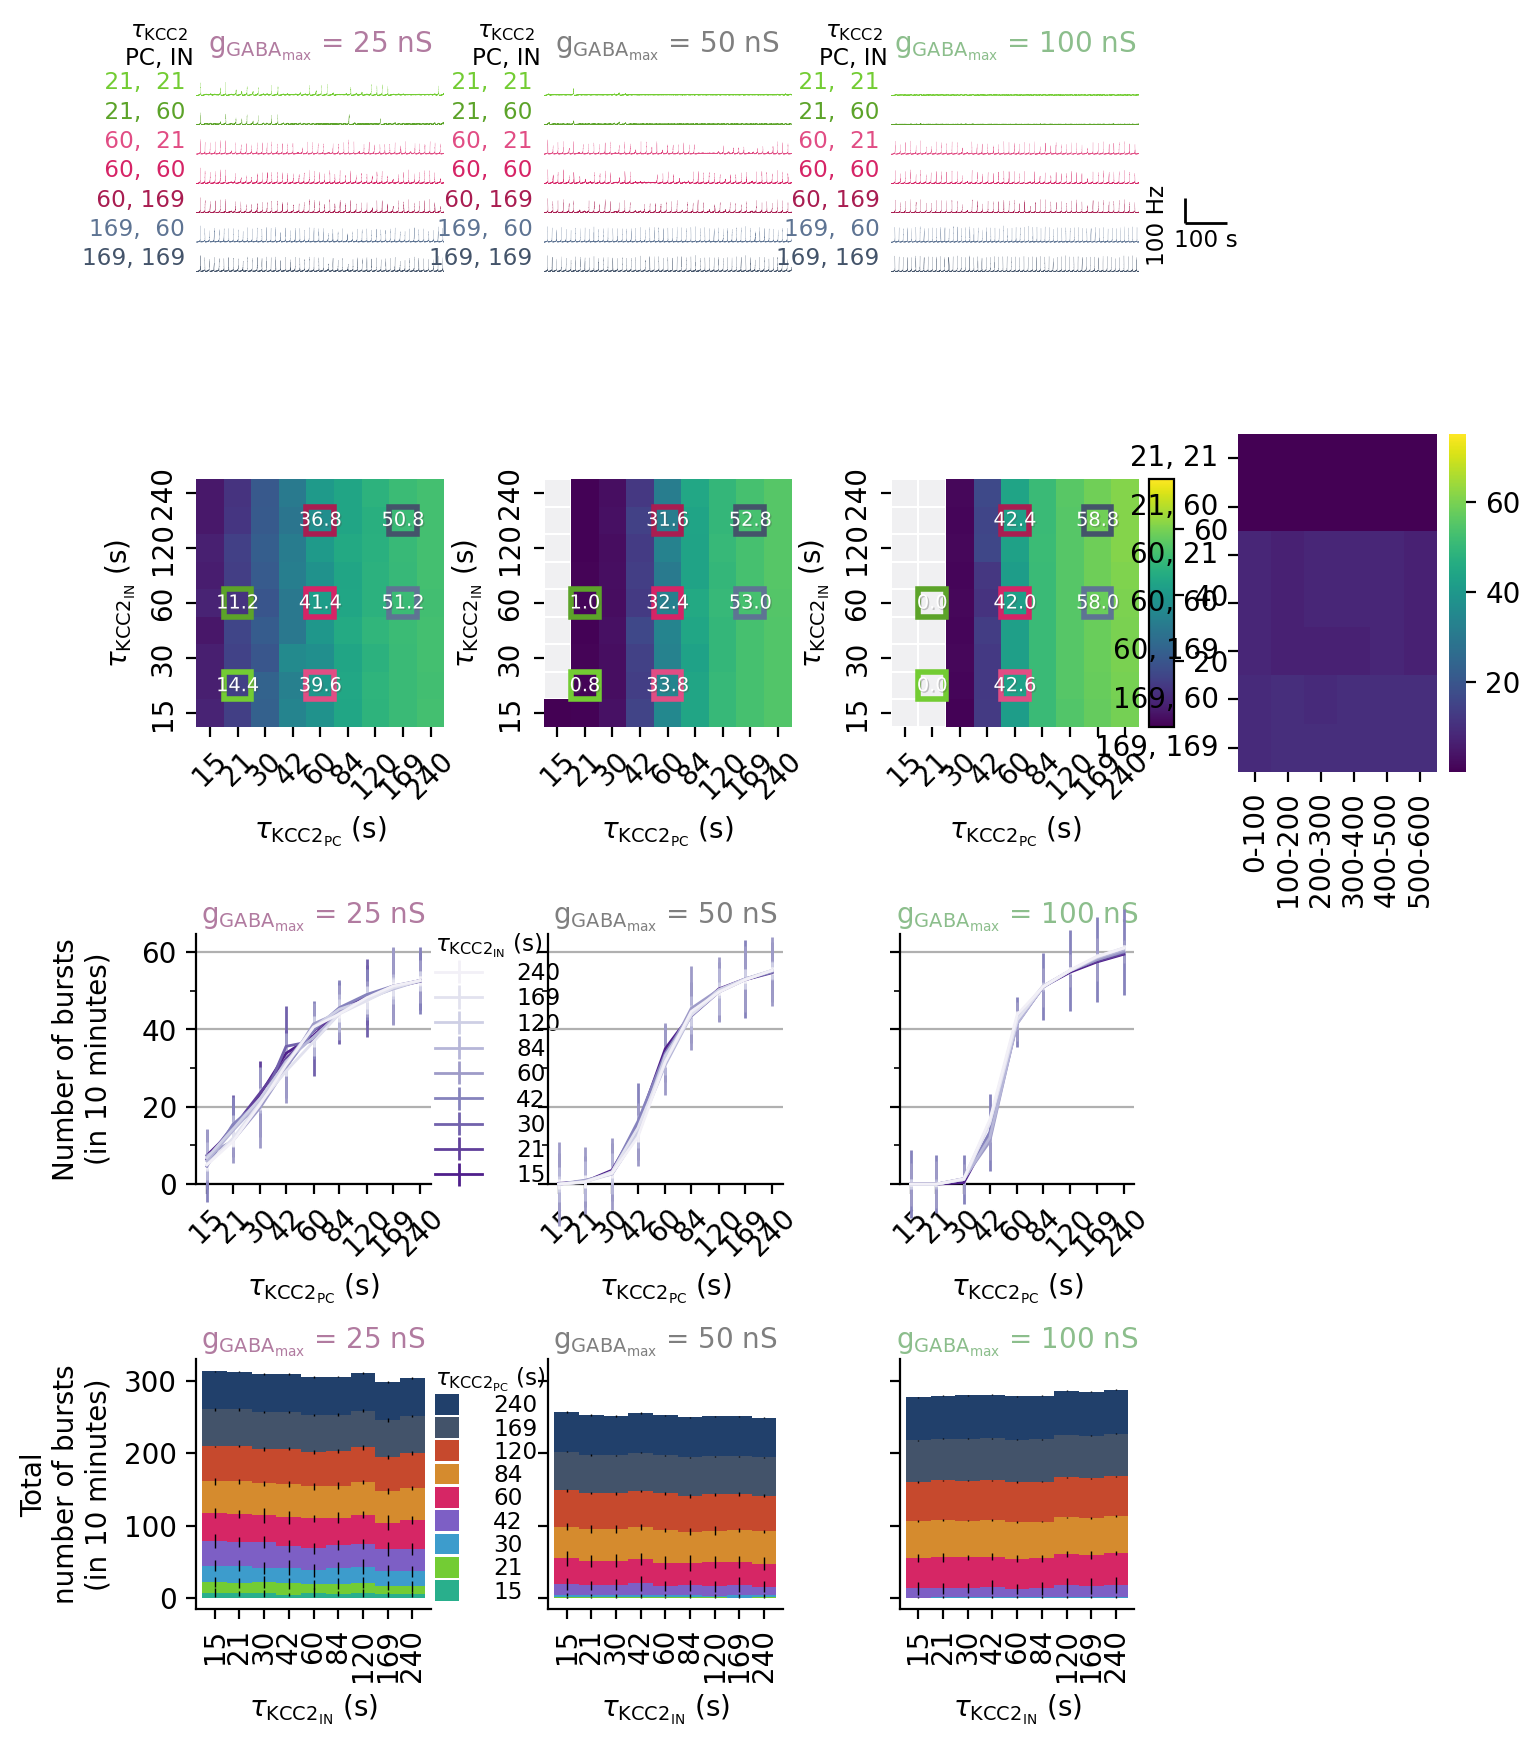

In [5]:
from scripts.lrdfigure_tau import Tau

tau = Tau(
    tau_KCC2_E_list=TAU_KCC2_LIST,
    tau_KCC2_I_list=TAU_KCC2_LIST,
    g_GABA_list=G_GABA_LIST,
    seeds=(
        None,
        1038,
        1337,
        1111,
        1010,
    ),
)

tau.run(duration=600, nrn_idx_i=[0, 1, 2, 3])
_, g = tau.plot(plot_g_GABA_list=[25, 50, 100])
if SAVE_FIGS:
    tau.save_figure(**save_args)

In [17]:
try:
    a = tau
except NameError:
    from scripts.lrdfigure_tau import logger
    from scripts.lrdfigure_tau import Tau

    tau = Tau(
        tau_KCC2_E_list=TAU_KCC2_LIST,
        tau_KCC2_I_list=TAU_KCC2_LIST,
        g_GABA_list=G_GABA_LIST,
        seeds=(
            None,
            1038,
            1337,
            1111,
            1010,
        ),
    )

    tau.run(duration=600, nrn_idx_i=[0, 1, 2, 3])
    print(logger)
    logger.setLevel(logging.INFO)
# logging.getLogger("scripts.lrdfigure_tau").setLevel(logging.DEBUG)
g = tau.plot(plot_ggaba=[25, 50, 100])


2023-06-28 15:23:59 [    INFO] plotting                                                                                   (scripts.lrdfigure_tau::lrdfigure_tau.py::740)


### Supplementary plots of $\tau_{KCC2_{IN}}$ and $\tau_{KCC2_{PC}}$

In [10]:
df_num_bursts = (
    g.groupby(
        ["g_GABA", "KCC2 E", "KCC2 I", "run_idx"],
        as_index=False,
    )
    .count()
    .rename(columns={"Burst start time (s)": "Number of bursts"})
)
df_num_bursts[constants.TAU_KCC2_I] = df_num_bursts["KCC2 I"].astype(
    int
)
df_num_bursts[constants.TAU_KCC2_E] = df_num_bursts["KCC2 E"].astype(
    int
)
df_num_bursts

g_GABA  KCC2 E  KCC2 I  run_idx  Number of bursts  Burst end time (s)   
0       25.0    15.0    15.0      0.0                 6                   6  \
1       25.0    15.0    15.0      1.0                18                  18   
2       25.0    15.0    15.0      2.0                 8                   8   
3       25.0    15.0    15.0      3.0                 0                   0   
4       25.0    15.0    15.0      4.0                 5                   5   
...      ...     ...     ...      ...               ...                 ...   
1615   200.0   240.0   240.0      0.0                74                  74   
1616   200.0   240.0   240.0      1.0                74                  74   
1617   200.0   240.0   240.0      2.0                74                  74   
1618   200.0   240.0   240.0      3.0                73                  73   
1619   200.0   240.0   240.0      4.0                73                  73   

      $\it{\tau}_{\rm{KCC2_{IN}}}$  $\it{\tau}_{\rm{KCC2_{PC}}}$  
0                               15                            15  
1                               15                            15  
2                               15                            15  
3                               15                            15  
4                               15                            15  
...                            ...                           ...  
1615                           240                           240  
1616                           240                           240  
1617                           240                           240  
1618                           240                           240  
1619                           240                           240  

[1620 rows x 8 columns]

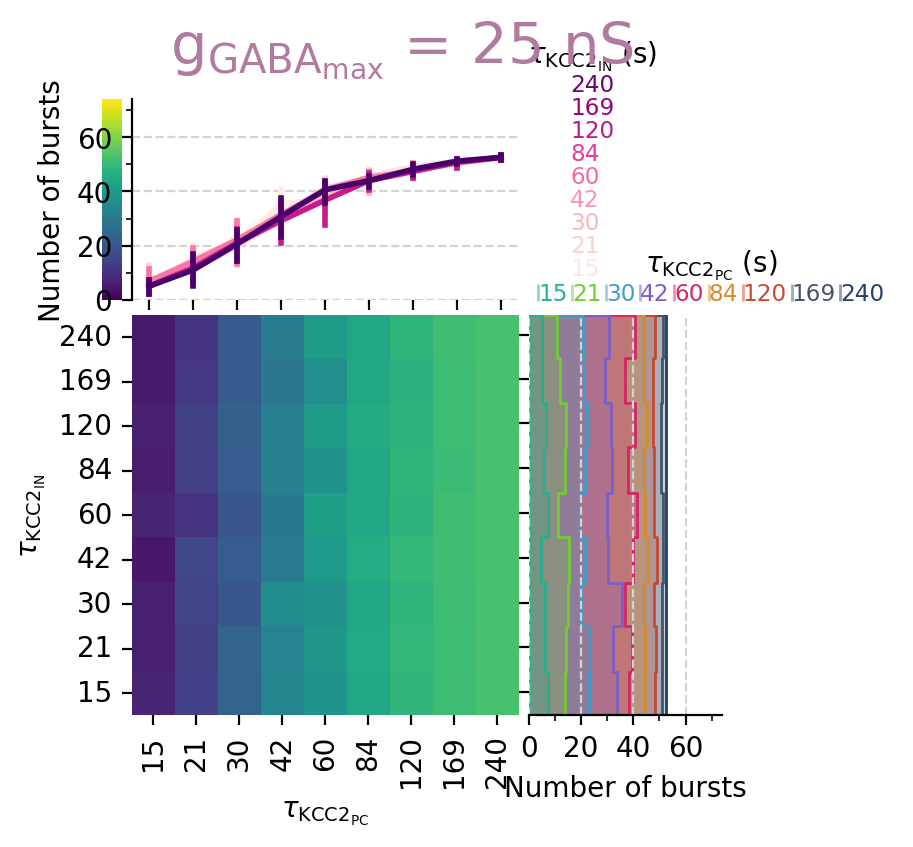

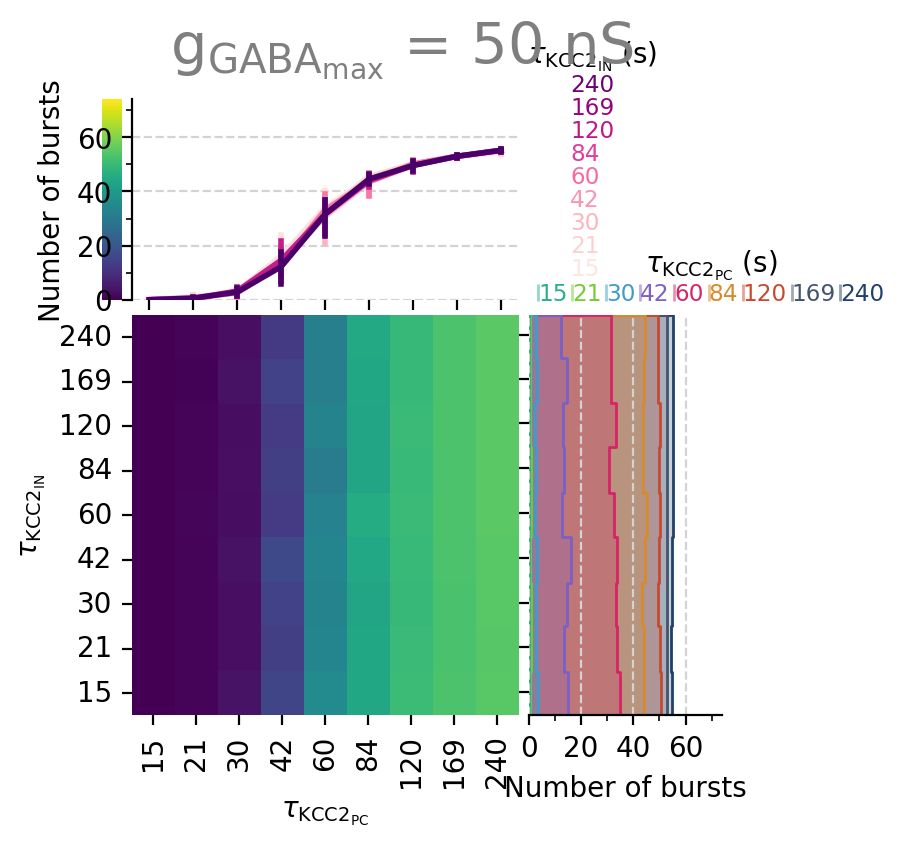

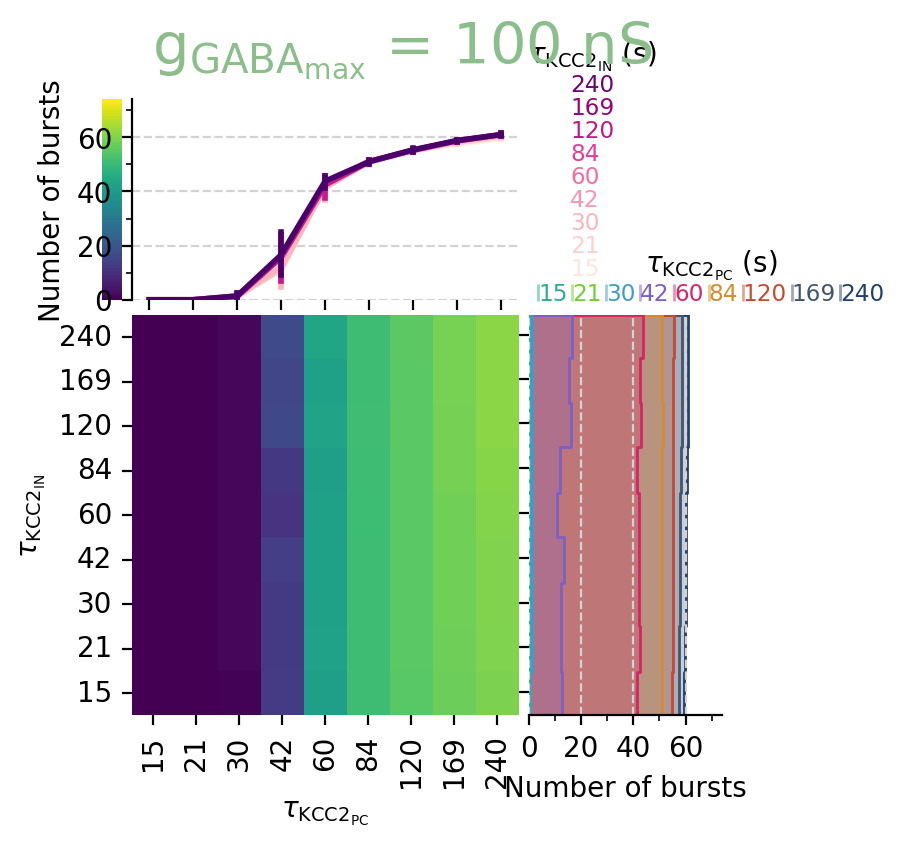

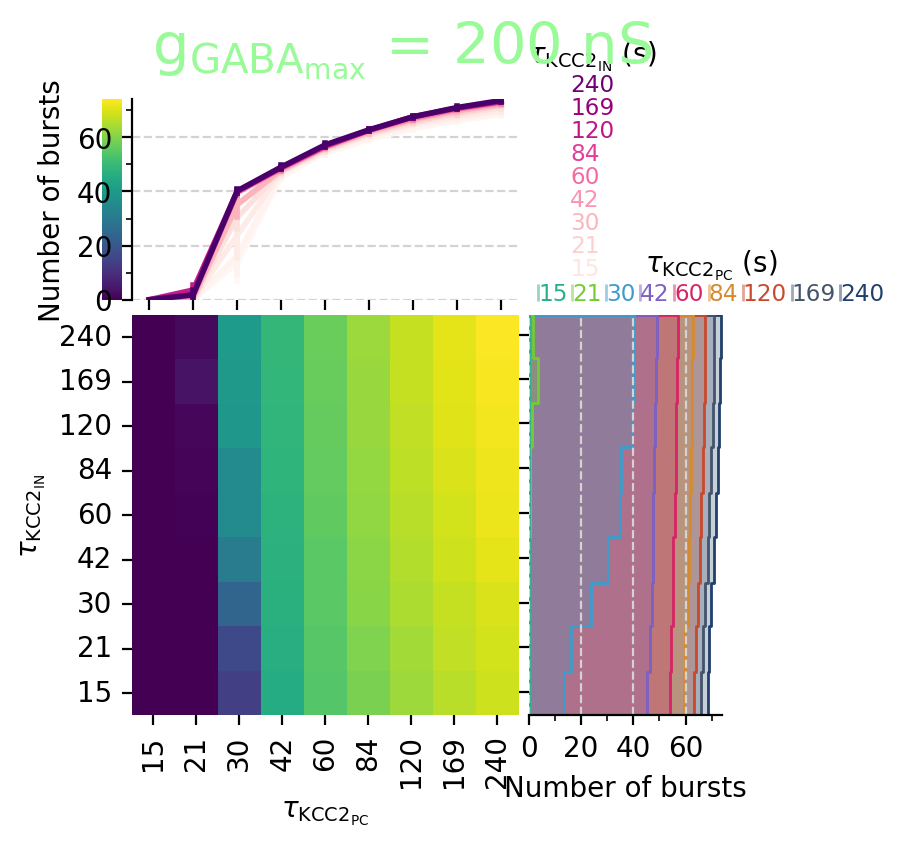

In [11]:
import seaborn as sns

vmax = df_num_bursts["Number of bursts"].max()

for g_gaba in G_GABA_LIST:
    df = df_num_bursts[df_num_bursts["g_GABA"] == g_gaba]

    fig, axes = plt.subplot_mosaic(
        [["heatmap_cbar", "tau_KCC2_E", "."], [".", "heatmap", "tau_KCC2_I"]],
        gridspec_kw={
            "height_ratios": [0.5, 1],
            "width_ratios": [0.05, 1, 0.5],
            "wspace": 0.05,
            "hspace": 0.05,
        },
        figsize=(4,4)
    )
    fig.suptitle(f"{constants.G_GABA} = {g_gaba} nS", color=COLOR.G_GABA_PAL_DICT[g_gaba])


    df[f"{constants.TAU_KCC2_E} (s)"] = df[constants.TAU_KCC2_E].apply(lambda x: f"{x:.0f}")
    df[constants.TAU_KCC2_E] = df[constants.TAU_KCC2_E].astype(int).astype("category")
    df[constants.TAU_KCC2_I] = df[constants.TAU_KCC2_I].astype(int).astype("category")


    mean_num_bursts = (
        df.groupby(
            ["g_GABA", constants.TAU_KCC2_E, constants.TAU_KCC2_I],
        )["Number of bursts"]
        .agg(["count", "sum", "mean", "std"])
        .reset_index()
        .rename(
            columns={
                "mean": "Number of bursts",
            }
        )
    )

    square_df = mean_num_bursts.pivot(
        index=constants.TAU_KCC2_I,
        columns=constants.TAU_KCC2_E,
        values="Number of bursts",
    )[::-1]
    sns.heatmap(
        square_df,
        ax=axes["heatmap"],
        cbar_ax=axes["heatmap_cbar"],
        # cbar_kws={"orientation": "horizontal"},
        cmap="viridis",
        # mask=square_df == 0,
        annot=False,
        fmt=".1f",
        annot_kws={"fontsize": 8},
        vmin=0.0, 
        vmax=vmax,
    )

    # lineplot for tau_KCC2_E
    df[constants.TAU_KCC2_I] = df[constants.TAU_KCC2_I].astype(int)
    tau_i = sorted(df[constants.TAU_KCC2_I].unique())

    sns.lineplot(
        data=df,
        x=f"{constants.TAU_KCC2_E} (s)",
        y="Number of bursts",
        hue=constants.TAU_KCC2_I,
        hue_order=tau_i,
        palette="RdPu",
        ax=axes["tau_KCC2_E"],
        legend=True,
        err_style="bars",
    )
    axes["tau_KCC2_I"].set_xlim(0, vmax)
    axes["tau_KCC2_E"].set_ylim(0, vmax)
    axes["heatmap_cbar"].set_ylim(0, vmax)


    ratio = tau_i[1] / tau_i[0]
    bins = np.append(tau_i, df[constants.TAU_KCC2_I].max() * ratio)
    sns.histplot(
        data=df.groupby([constants.TAU_KCC2_I, constants.TAU_KCC2_E]).mean(
            numeric_only=True
        ),
        y=constants.TAU_KCC2_I,
        weights="Number of bursts",
        stat="count",
        hue=constants.TAU_KCC2_E,
        hue_order=sorted(df[constants.TAU_KCC2_E].unique()),
        palette=COLOR.TAU_PAL,
        multiple="layer",
        element="step",
        bins=bins,
        ax=axes["tau_KCC2_I"],
    )
    # set x scale to log 2
    axes["tau_KCC2_I"].set_yscale("log", base=ratio)
    axes["tau_KCC2_I"].set_yticks(df[constants.TAU_KCC2_I].unique() + np.diff(bins) / 2)
    axes["tau_KCC2_I"].set_yticklabels(df[constants.TAU_KCC2_I].unique())
    axes["tau_KCC2_I"].set_ylim(bins[0], bins[-1])

    sns.despine(ax=axes["tau_KCC2_E"], bottom=True)
    axes["tau_KCC2_E"].set(xlabel="")
    axes["tau_KCC2_E"].tick_params(
        axis="x", which="both", bottom=True, top=False, labelbottom=False
    )
    axes["tau_KCC2_E"].set_yticks(np.arange(0, vmax + 1, 20))
    axes["tau_KCC2_E"].set_yticks(np.arange(0, vmax + 1, 10), minor=True)
    axes["tau_KCC2_E"].grid(axis='y', which="major", color="lightgrey", linestyle="--", zorder=-1)

    sns.despine(ax=axes["tau_KCC2_I"], left=True)
    axes["tau_KCC2_I"].set(ylabel="", xlabel="Number of bursts")
    axes["tau_KCC2_I"].tick_params(axis="y", which="both", left=True, labelleft=False)
    axes["tau_KCC2_I"].set_xticks(np.arange(0, vmax + 1, 20))
    axes["tau_KCC2_I"].set_xticks(np.arange(0, vmax + 1, 10), minor=True)
    axes["tau_KCC2_I"].grid(axis="x", which="major", color="lightgrey", linestyle="--", zorder=-99)

    sns.despine(ax=axes["heatmap_cbar"], left=True, bottom=True)
    axes["heatmap_cbar"].tick_params(
        axis="y", which="both", left=False, right=False, labelleft=False, labelright=False
    )
    # LEGEND
    handles = [
        plt.Rectangle(
            (0, 0),
            1, 1,
            fill=True,
            color=COLOR.TAU_PAL_DICT[i], alpha=0.5,
            edgecolor=COLOR.TAU_PAL_DICT[i],
        )
        for i in sorted(df[constants.TAU_KCC2_E].unique())
    ]

    axes["tau_KCC2_I"].legend(
        handles,
        sorted(df[constants.TAU_KCC2_E].unique(), reverse=False),
        loc=(0, 1),
        ncol=len(df[constants.TAU_KCC2_E].unique()),
        handletextpad=0,
        handlelength=0,
        columnspacing=0.2,
        labelspacing=0,
        labelcolor=COLOR.TAU_PAL,
        fontsize="x-small",
        title=f"{constants.TAU_KCC2_E} (s)",
        title_fontsize="small",
        frameon=False,
    )
    leg = axes["tau_KCC2_E"].legend(
        tau_i[::-1],
        loc=(1, 0.05),
        handletextpad=0,
        handlelength=0,
        columnspacing=0.2,
        labelspacing=0,
        labelcolor=sns.color_palette("RdPu_r", len(tau_i)),
        fontsize="x-small",
        title=f"{constants.TAU_KCC2_I} (s)",
        title_fontsize="small",
        frameon=False,
    )

    if SAVE_FIGS:
        from style.figure import plot_save
        plot_save(f"output/figure_4_tau_{g_gaba}.svg", figs=[fig])

## $g_{GABA_{max}}$ vs $\tau_{KCC2}$ with $E_{GABA}$

First, plot number of bursts as a function of $g_{GABA_{max}}$ as we directly vary $E_{GABA}$ (static $Cl^-$).

Next, plot number of bursts and $E_{GABA}$ as a function of $g_{GABA_{max}}$ and $\tau_{KCC2}$. 

Finally, plot the relationship between the pre-burst GABAergic current ($I_{GABA}$) and the number of bursts. The $g_{GABA_{max}}$ and $\tau_{KCC2}$ are displayed for reference as color and marker size, respectively. Squares are from static simulations.

2023-06-04 09:13:04 [    INFO] PART 1
********************                                                                (scripts.lrdfigure_ggaba_e::lrdfigure_ggaba_e.py::75)
2023-06-04 09:13:07 [    INFO] loaded ['$g_{GABA_{max}}$', 'run_idx', 'var'] ((1020000, 513)) from cache temp/6351831fdb91a48b63c05bfa4a9aa881.h5 (core.lrdfigure::lrdfigure.py::446)
2023-06-04 09:13:07 [    INFO] PART 2 
********************                                                               (scripts.lrdfigure_ggaba_e::lrdfigure_ggaba_e.py::107)
2023-06-04 09:13:19 [    INFO] loaded ['$g_{GABA_{max}}$', '$\it{\tau}_{\rm{KCC2}}$', 'run_idx', 'var'] ((600000, 3267)) from cache temp/877d9f23a25a695e4661415b5f7b74b1.h5 (core.lrdfigure::lrdfigure.py::446)
2023-06-04 09:13:29 [    INFO] plotting                                                                                   (scripts.lrdfigure_ggaba_e::lrdfigure_ggaba_e.py::331)
2023-06-04 09:13:30 [    INFO] took 0.73s to plot                              

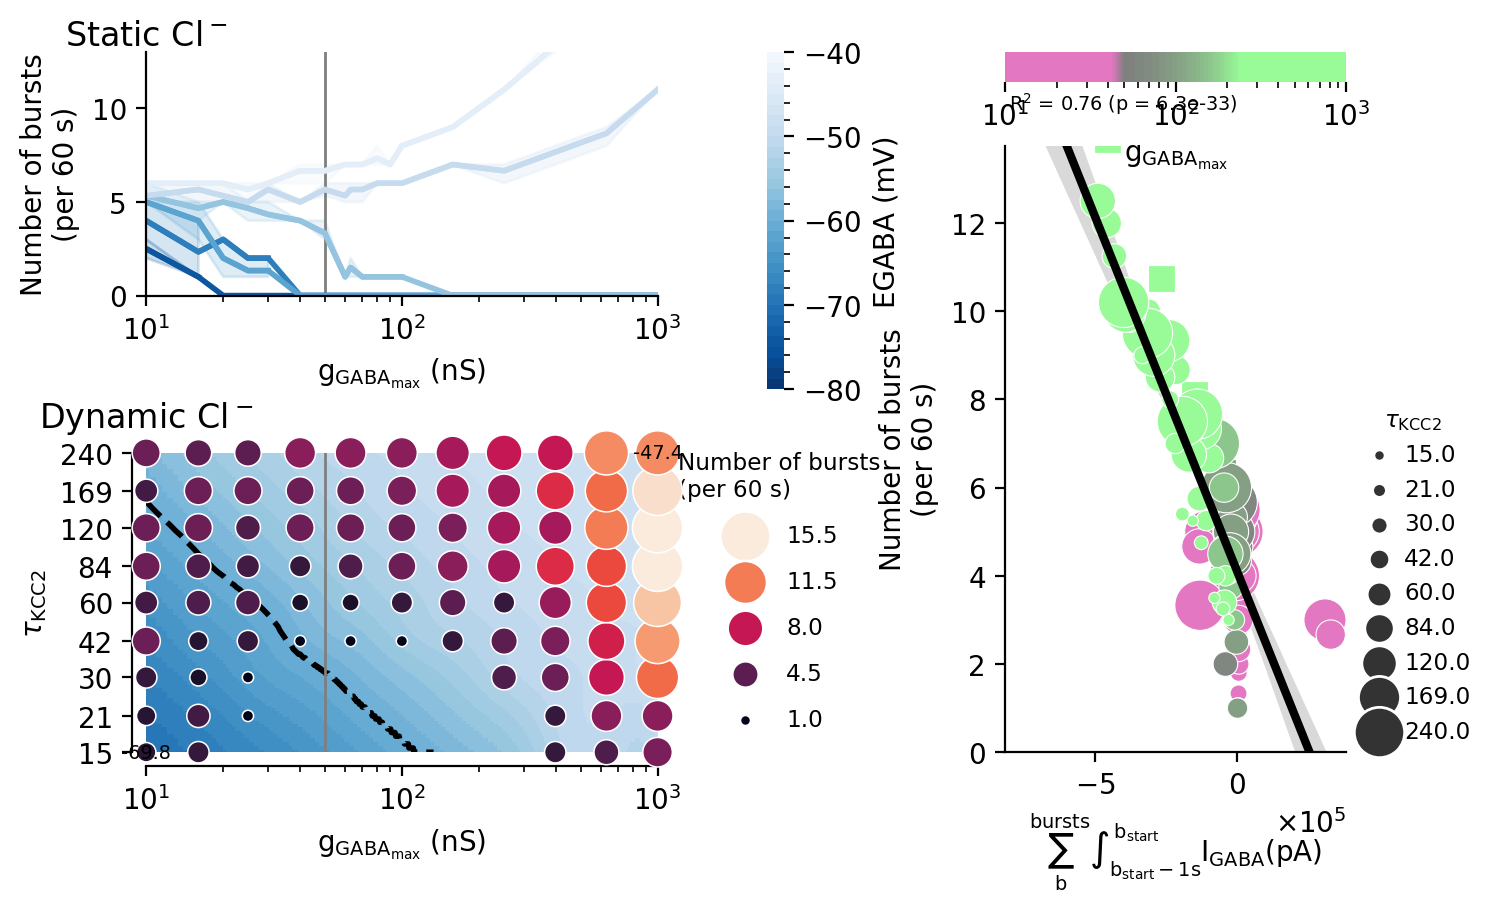

In [12]:
from scripts.lrdfigure_ggaba_e import Gve

gve = Gve(
    seeds=(None, 1234, 5678),
    gGABAsvEGABA=sorted(
        set(
            np.append(
                np.round(np.arange(0, 100.0001, 10), 0),
                np.geomspace(10, 1000, 11).round(0),
            )
        )
    ),
    gGABAs=np.geomspace(10, 1000, 11).round(0),
    tau_KCC2s=TAU_KCC2_LIST,
)
gve.run()
gve.process()
gve.plot(egabas=5)
if SAVE_FIGS:
    gve.save_figure(figs=gve.figs, **save_args)

''

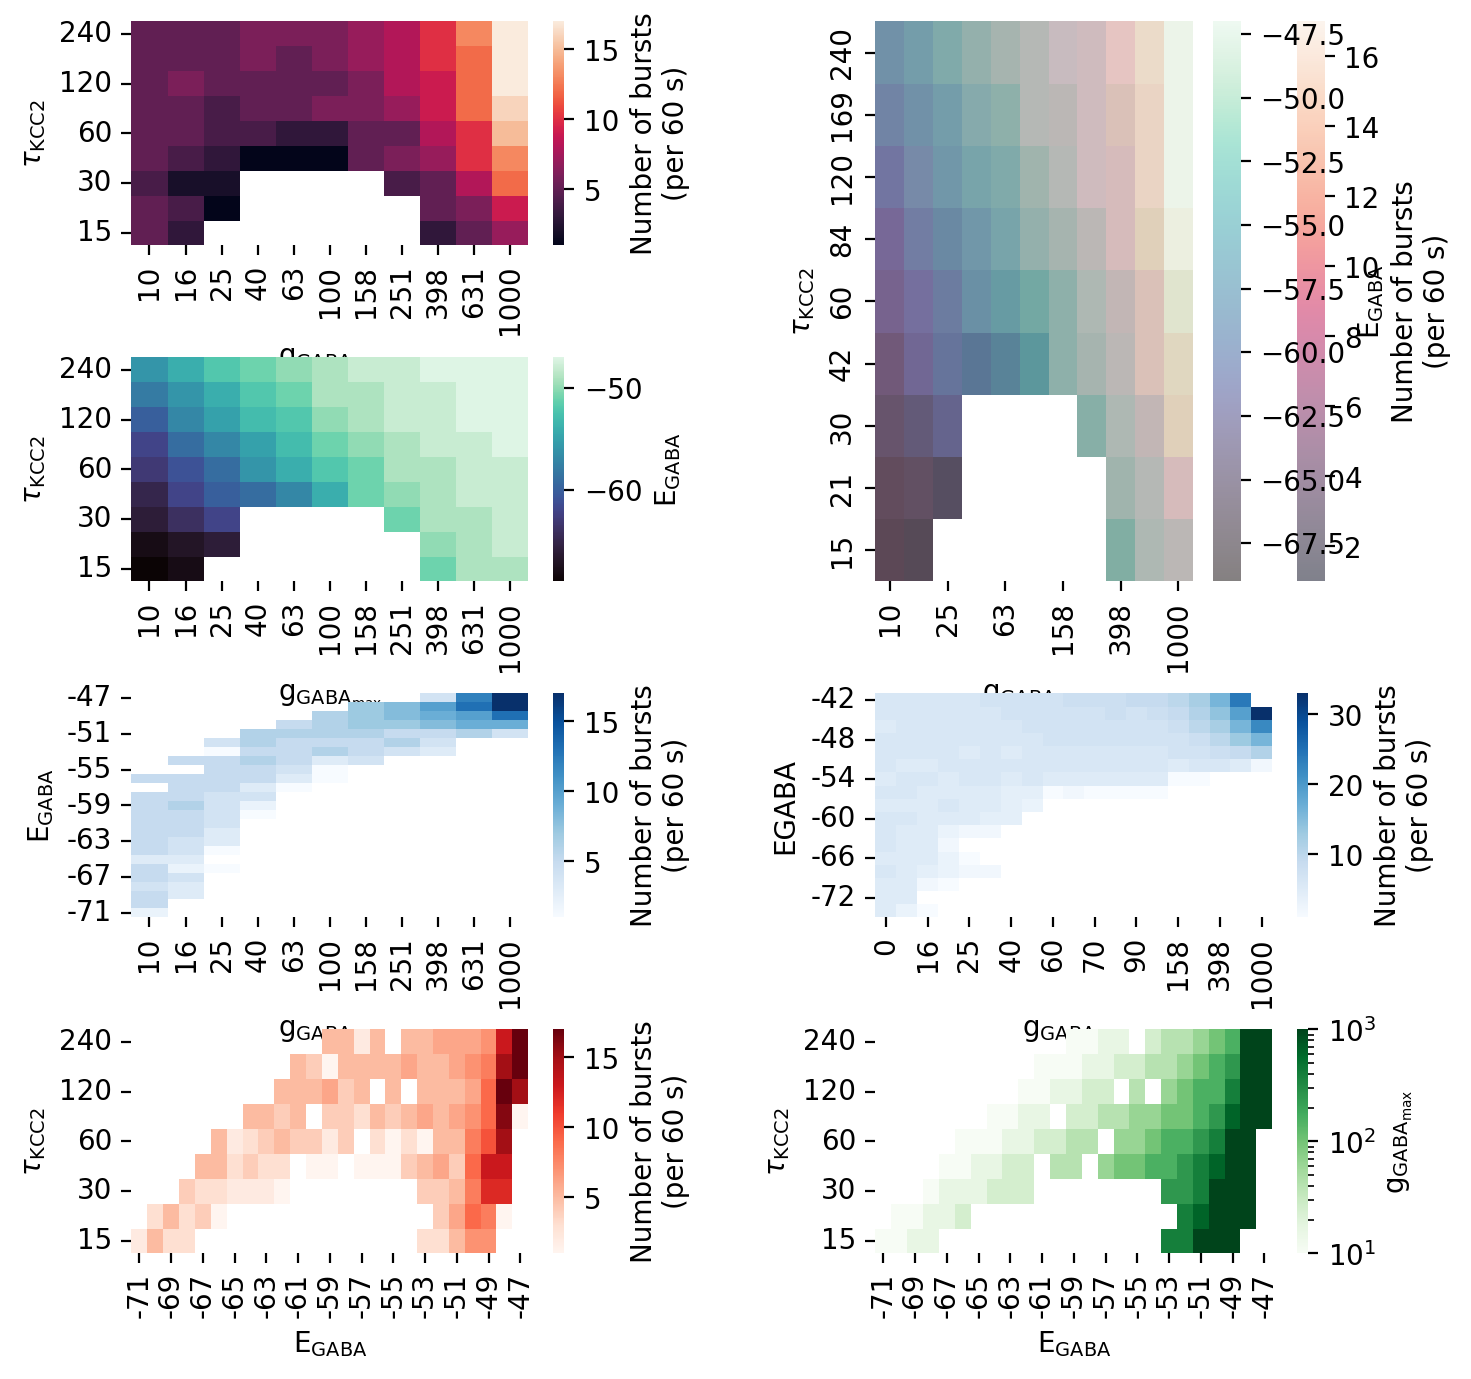

In [13]:
# gve.i_explore()
fig, axes = plt.subplot_mosaic("""
AC
BC
DE
FG""", 
figsize=(8, 8),
gridspec_kw={"wspace": 0.5, "hspace": 0.5}
)
agg = "max"
# tau vs g_gaba
gve.plot_heatmap(y=constants.TAU_KCC2, x=constants.G_GABA, agg=agg, ax=axes["A"], cmap="rocket")
# EGABA vs g_gaba
gve.plot_heatmap(y=constants.TAU_KCC2, x=constants.G_GABA, c=constants.E_GABA, agg=agg, ax=axes["B"], cmap="mako")

# again, but overlaid
alpha=0.5
gve.plot_heatmap(y=constants.TAU_KCC2, x=constants.G_GABA, agg=agg, ax=axes["C"], cmap="rocket", alpha=alpha)
gve.plot_heatmap(y=constants.TAU_KCC2, x=constants.G_GABA, c=constants.E_GABA, agg=agg, ax=axes["C"], cmap="mako", alpha=alpha)

# EGABA vs g_gaba (dynamic)
gve.plot_heatmap(y=constants.E_GABA, x=constants.G_GABA, agg=agg, ax=axes["D"], cmap="Blues")
# EGABA vs g_gaba (static)
gve.plot_heatmap(y="EGABA", x=constants.G_GABA, agg=agg, ax=axes["E"], static=True, cmap="Blues", vmax=17, 
                #  query="-72 <= EGABA <= -46"
                 )

# tau vs egaba
gve.plot_heatmap(y=constants.TAU_KCC2, x=constants.E_GABA, agg=agg, ax=axes["F"], cmap="Reds")
gve.plot_heatmap(y=constants.TAU_KCC2, x=constants.E_GABA, c=constants.G_GABA, agg=agg, ax=axes["G"], cmap="Greens")
# gve.plot_heatmap(x=constants.TAU_KCC2, y=gve.num_bursts_col, c=constants.E_GABA, agg="mean", ax=axes["G"], cmap="Reds")
;

## Supplementary: investigate how excitatory parameters affect the number of bursts.

Specifically, we vary:
1. $g_{AMPA_{max}}$
2. $g_{NMDA_{max}}$

And run static $Cl^-$ simulations at hyperpolarised (blue), close to $V_{rest}$ (purple), and depolarised (red) EGABA values.

2023-06-04 09:13:40 [    INFO] loaded ['$g_{GABA_{max}}$', '$g_{AMPA_{max}}$', '$g_{NMDA_{max}}$', 'run_idx', 'var'] ((1020000, 972)) from cache temp/3cdf22d4b3a2a05c671ec28219a6ec41.h5 (core.lrdfigure::lrdfigure.py::446)
processing bursts: 100%|██████████| 108/108 [00:26<00:00,  4.08it/s]
2023-06-04 09:14:07 [    INFO] plotting                                                                                   (scripts.lrdfigure_gampa::lrdfigure_gampa.py::191)
2023-06-04 09:14:08 [    INFO] plotting rate example                                                                      (scripts.lrdfigure_gampa::lrdfigure_gampa.py::205)
2023-06-04 09:14:15 [    INFO] saving figures                                                                             (core.lrdfigure::lrdfigure.py::269)
2023-06-04 09:14:15 [    INFO] saving to output/figure_s1_gampa_rates_example_5.svg                                       (plot_save::figure.py::64)
2023-06-04 09:14:17 [    INFO] Saved figures [2]        

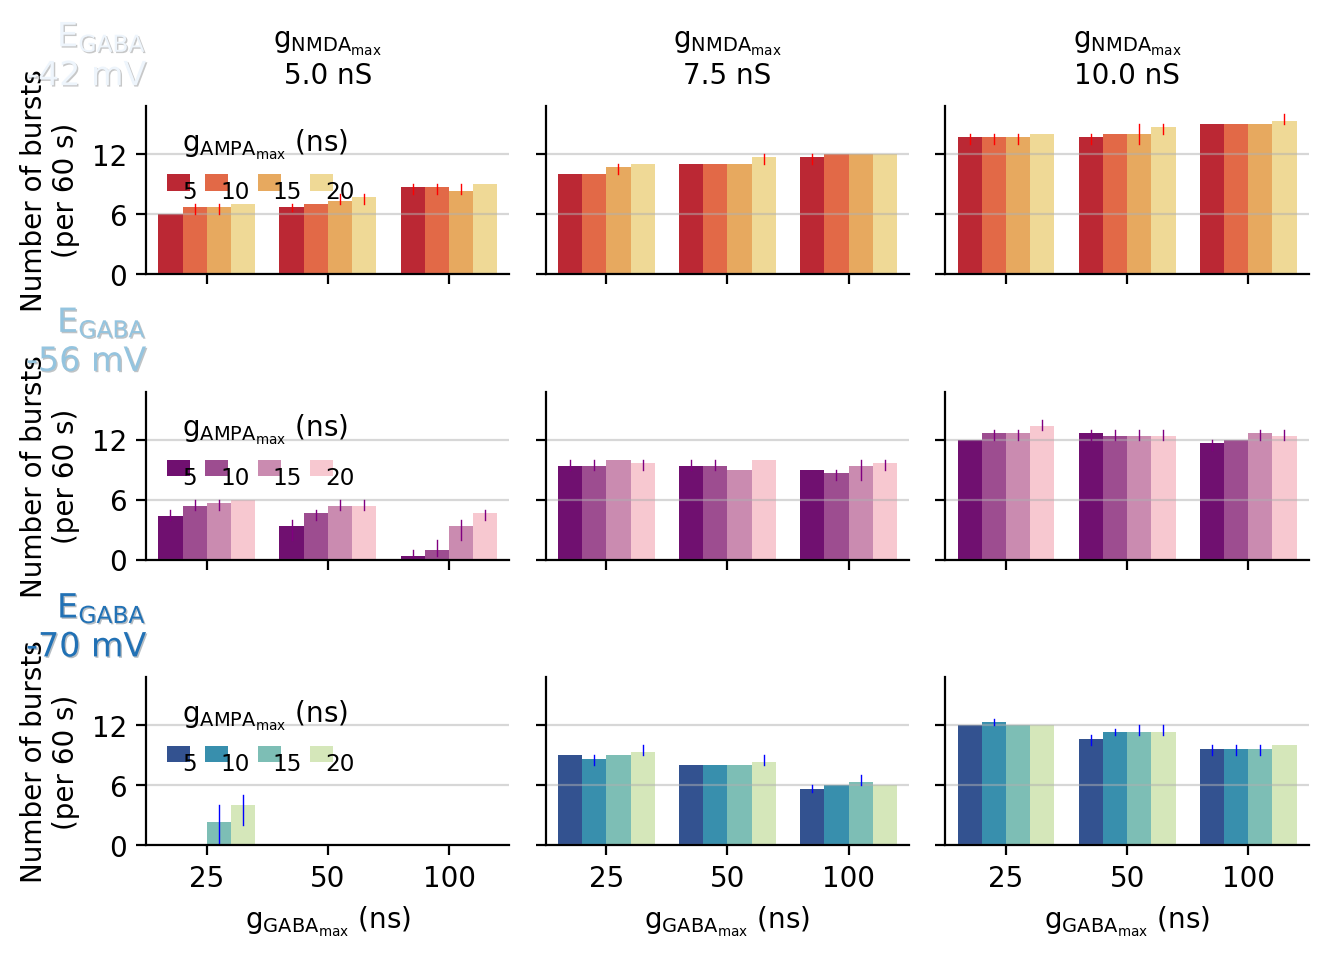

In [14]:
from scripts.lrdfigure_gampa import Params

exc_params = Params(
    gGABAs=[
        # 0,
        25,
        50,
        100,
        # 200,
    ],
    gAMPAs=np.round(np.arange(0, 20.0001, 5.0), 0),
    gNMDAs=[5.0, 7.5, 10.0],
    seeds=(
        None,
        1013,
        12987,
        #    1234, 1837
    ),
)
exc_params.run()
exc_params.process()
exc_params.plot(egabas=[-42, -56, -70])

if SAVE_FIGS:
    exc_params.save_figure(**save_args)


# Playground

`None` keeps default values (see `core.sim.py`)

In [ ]:
from core.sim import single_run

net, results = single_run(
    N=None,
    duration=None,
    dt=None,  # Simulation params
    Mg2_t0=None,
    zero_mag_wash_rate=None,  # Seizure params
    benzo_onset_t=None,
    benzo_wash_rate=None,
    benzo_strength=None,
    benzo_off_t=None,  # drug params
    p=None,
    p_ee=None,
    p_ei=None,
    p_ie=None,
    p_ii=None,  # Connection params
    w=None,
    w_ee=None,
    w_ei=None,
    w_ie=None,
    w_ii=None,  # weight params
    U_0=None,
    tau_d=None,
    tau_f=None,  # STP params
    g_AMPA_max=None,
    g_NMDA_max=None,
    g_GABA_max=None,  # conductances
    E_Cl_0=None,
    E_Cl_target=None,
    E_Cl_end=None,
    E_Cl_pop=None,  # ECl params
    length=None,  # neuron params
    dyn_cl=None,
    manual_cl=None,  # dynamic/manual arg
    tau_KCC2_E=None,
    tau_KCC2_I=None,
    num_ecl_steps=None,  # dynamic + manual params
    __build=True,
    __save_run=False,
    __monitors=None,
    nrn_idx_i=None,  # Brian2 args
    run_seed=None,
    __plot=True,
    __device_directory=None,
)